<img src='../OUTILS/bandeau_MF.png' align='right' width='100%'/>

<div class="alert alert-info alert-success">
<h3>Visualisation des données avec SatPy - MSG/SEVIRI </h3></div>

## <a id='TOC-TOP'></a>Contenus

## Manipulation des données SEVIRI

Ce TP présente certaines des fonctionnalités de base de SatPy, tel que l'ouverture de fichiers, l'affichage de différents canaux, le rééchantillonnage, etc.

### SatPy

Il s'agit d'une bibliothèque Python pour le traitement des données des satellites météorologiques

Satpy permet de lire, manipuler et écrire des données issues d'instruments satellites météorologiques d'observation de la Terre.

Satpy fournit la possibilité de lire les données de différents formats (readers) et de manipuler les paramètres géophysiques de ces différents formats de fichiers.

Satpy fournit également des interfaces pour créer des images RVB (rouge/vert/bleu) qui combinent les données de plusieurs bandes d'instruments ou produits.

Diverses corrections atmosphériques et améliorations visuelles sont fournies pour améliorer le rendu et la qualité des images de sortie. Les données de sortie peuvent être écrites dans plusieurs formats de fichiers tels que les fichiers NetCDF, PNG et GeoTIFF.

Satpy permet également aux utilisateurs de rééchantillonner les données sur des grilles géographiques projetées (zones).

Pour obtenir de la documentation sur Satpy, quelques exemples, et un tutoriel de démarrage rapide : https://satpy.readthedocs.io/en/latest/index.html


### Comment importer des données ?

Pour ce TP, nous avons utilisé le fichier au format NATIVE. Le fichier utilisé est MSG3-SEVI-MSG15-0100-NA-20240617121242.589000000Z-NA.nat

La première étape consiste à importer les bibliothèques nécessaires, à spécifier l'emplacement de l'image ou de la scène (assurez-vous que vous utilisez une barre oblique inverse) et de chargez celle-ci avec le header correspondant.


<div class="alert alert-block alert-warning">
    
<b>PREREQUIS </b>
    
Ce Notebook ne nécessite pas de prérequis

</div>
<hr>

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1.Tout d'abord, il faut procéder à l'importation des librairies nécessaires.

</div>

In [50]:
from satpy.scene import Scene
from satpy.resample import get_area_def
from satpy import find_files_and_readers
from datetime import datetime
import sys
import ipympl
import cartopy
from pyresample.geometry import AreaDefinition
import numpy as np
import os
from osgeo import gdal
from PIL import Image
import subprocess
import glob
from IPython.display import display,HTML
from satpy.writers import get_enhanced_image, to_image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
os.environ['PATH'] = f"~/.conda/envs/env_MF_stage/bin:{os.environ['PATH']}" 
os.environ['GDAL_DATA'] = '/home/coster/.conda/envs/env_MF_stage/share/gdal'
os.environ['PROJ_LIB'] = '/home/coster/.conda/envs/env_MF_stage/share/proj'

In [9]:
download_dir = os.path.join(os.getcwd(), "../RESULTS")
os.makedirs(download_dir, exist_ok=True)

In [10]:
output = '../RESULTS/'

Définissons la donnée d'entrée dans une variable :

In [12]:
# format de date : YYYYMMDDhhmm. Indiquer le bon lien de répertoire. Transformer les "\" en "/". Utiliser un asterisque "*" si nécessaire.
fnames = glob.glob('/stockage/DATA/MSG3-SEVI-MSG15-0100-NA-20240617121242.589000000Z-NA.nat')

In [13]:
fnames

['/stockage/DATA/MSG3-SEVI-MSG15-0100-NA-20240617121242.589000000Z-NA.nat']


<div class="alert alert-info" role="alert">

## <a id='section2'></a>2.Lecture des données dans le NetCDF

</div>

Il est possible d'obtenir la liste de tous les types de données que satpy peut lire (readers).


In [14]:
from satpy import available_readers
available_readers()

['abi_l1b',
 'abi_l1b_scmi',
 'abi_l2_nc',
 'acspo',
 'agri_fy4a_l1',
 'agri_fy4b_l1',
 'ahi_hrit',
 'ahi_hsd',
 'ahi_l1b_gridded_bin',
 'ahi_l2_nc',
 'ami_l1b',
 'amsr2_l1b',
 'amsr2_l2',
 'amsr2_l2_gaasp',
 'amsub_l1c_aapp',
 'atms_l1b_nc',
 'atms_sdr_hdf5',
 'avhrr_l1b_aapp',
 'avhrr_l1b_eps',
 'avhrr_l1b_hrpt',
 'avhrr_l1c_eum_gac_fdr_nc',
 'cmsaf-claas2_l2_nc',
 'electrol_hrit',
 'epic_l1b_h5',
 'fci_l1c_nc',
 'fci_l2_nc',
 'fy3a_mersi1_l1b',
 'fy3b_mersi1_l1b',
 'fy3c_mersi1_l1b',
 'geocat',
 'gerb_l2_hr_h5',
 'ghi_l1',
 'ghrsst_l2',
 'gld360_ualf2',
 'glm_l2',
 'goci2_l2_nc',
 'goes-imager_hrit',
 'goes-imager_nc',
 'gpm_imerg',
 'hsaf_h5',
 'hy2_scat_l2b_h5',
 'iasi_l2',
 'iasi_l2_cdr_nc',
 'ici_l1b_nc',
 'jami_hrit',
 'li_l2_nc',
 'maia',
 'meris_nc_sen3',
 'mersi2_l1b',
 'mersi3_l1b',
 'mersi_ll_l1b',
 'mersi_rm_l1b',
 'mhs_l1c_aapp',
 'mimicTPW2_comp',
 'mirs',
 'msi_safe',
 'msi_safe_l2a',
 'msu_gsa_l1b',
 'mtsat2-imager_hrit',
 'mviri_l1b_fiduceo_nc',
 'mwi_l1b_nc',
 'mws_

In [15]:
scn = Scene(reader='seviri_l1b_native',  filenames=fnames)

Il est possible d'obtenir la liste de tous les canaux disponible dans le fichier

In [16]:
scn.available_dataset_names()

['HRV',
 'IR_016',
 'IR_039',
 'IR_087',
 'IR_097',
 'IR_108',
 'IR_120',
 'IR_134',
 'VIS006',
 'VIS008',
 'WV_062',
 'WV_073']

On peut charger les attributs d'un canal en utilisant son nom

In [17]:
scn.load(['IR_108'], upper_right_corner='NE')

scn.keys()

INFO:satpy.readers.yaml_reader:Flipping Dataset unknown_name upsidedown.
INFO:satpy.readers.yaml_reader:Flipping Dataset unknown_name leftright.


[DataID(name='IR_108', wavelength=WavelengthRange(min=9.8, central=10.8, max=11.8, unit='µm'), resolution=3000.403165817, calibration=<calibration.brightness_temperature>, modifiers=())]

Ou bien en utilisant uniquement la longueur d'onde

In [18]:
scn.load([10.8], upper_right_corner='NE')

scn.keys()

[DataID(name='IR_108', wavelength=WavelengthRange(min=9.8, central=10.8, max=11.8, unit='µm'), resolution=3000.403165817, calibration=<calibration.brightness_temperature>, modifiers=())]

Il est alors possible de consulter ces attributs.
Par exemple : la zone géographique des données

In [19]:
scn['IR_108'].attrs['area']

Area ID: msg_seviri_fes_3km
Description: MSG SEVIRI Full Earth Scanning service area definition with 3 km resolution
Projection: {'a': '6378169', 'h': '35785831', 'lon_0': '0', 'no_defs': 'None', 'proj': 'geos', 'rf': '295.488065897014', 'type': 'crs', 'units': 'm', 'x_0': '0', 'y_0': '0'}
Number of columns: 3712
Number of rows: 3712
Area extent: (-5570248.4773, -5567248.0742, 5567248.0742, 5570248.4773)

Ou des infos de date de début, de fin

In [20]:
print(scn['IR_108'].attrs['start_time'])
print(scn['IR_108'].attrs['end_time'])

2024-06-17 12:00:00
2024-06-17 12:15:00


Pour avoir la liste de tous les attributs consultables :

In [21]:
print(scn['IR_108'].attrs.keys())

dict_keys(['orbital_parameters', 'units', 'wavelength', 'standard_name', 'platform_name', 'sensor', 'georef_offset_corrected', 'time_parameters', 'start_time', 'end_time', 'reader', 'area', 'name', 'resolution', 'calibration', 'modifiers', '_satpy_id', 'ancillary_variables'])


Il est aussi possible de connaitre les métadonnées de l'image chargée

In [22]:
print(scn)

<xarray.DataArray 'reshape-421323b59db307daf97b48af76fdf97f' (y: 3712, x: 3712)> Size: 55MB
dask.array<getitem, shape=(3712, 3712), dtype=float32, chunksize=(461, 3712), chunktype=numpy.ndarray>
Coordinates:
    acq_time  (y) datetime64[ns] 30kB NaT NaT NaT NaT NaT ... NaT NaT NaT NaT
    crs       object 8B PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["unknow...
  * y         (y) float64 30kB 5.569e+06 5.566e+06 ... -5.563e+06 -5.566e+06
  * x         (x) float64 30kB -5.569e+06 -5.566e+06 ... 5.563e+06 5.566e+06
Attributes: (12/18)
    orbital_parameters:       {'projection_longitude': 0.0, 'projection_latit...
    units:                    K
    wavelength:               10.8 µm (9.8-11.8 µm)
    standard_name:            toa_brightness_temperature
    platform_name:            Meteosat-10
    sensor:                   seviri
    ...                       ...
    name:                     IR_108
    resolution:               3000.403165817
    calibration:              brightness_t

<div class="alert alert-info" role="alert">

## <a id='section3'></a>3.Visualisation des données
[Back to top](#TOC-TOP)

</div>

Pour visualiser les données de la longueur d'onde qui a été chargée :

In [23]:
img_path = '../RESULTS/ir108.png'
scn.save_datasets(writer='simple_image', datasets=['IR_108'], filename=img_path)

INFO:satpy.writers:Computing and writing results...


In [28]:
with Image.open(output + 'ir108.png') as img:
        resized_img = img.resize((500, 500)) # redimmensionnement en 500 x 500 pixel
        resized_img.save(output + 'ir108_resized.png')

In [29]:
!convert -resize 700  $output/ir108_resized.png $output/ir108_resized.jpg

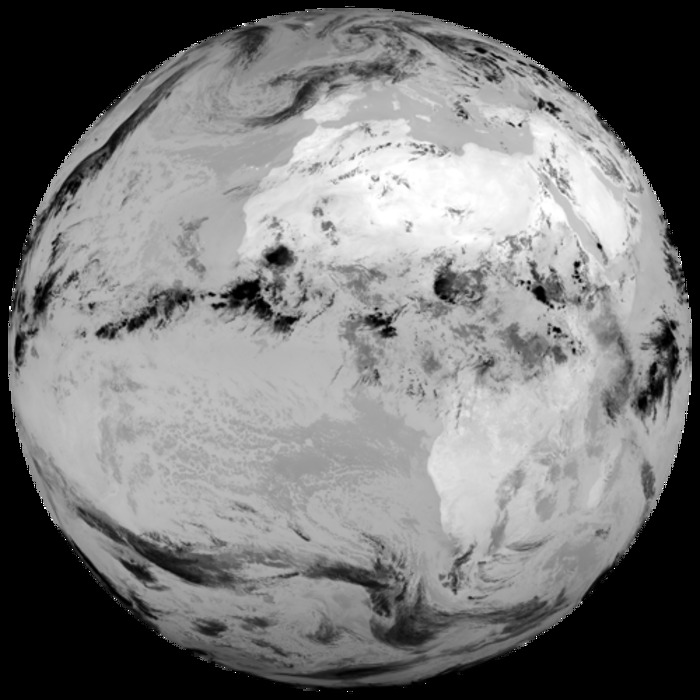

In [30]:
im = Image.open(output + '/ir108_resized.jpg', 'r')
display(im)

A noter que pour que l'image soit orientée avec le nord en haut avec Satpy: ne pas oublier d'indiquer  "upper_right_corner='NE'" lors du chargement de l'image

Satpy fournit également un grand nombre de fonctionnalités permettant de générer des compositions colorées de type RVB.
Pour consulter la liste des compositions colorées disponibles, il faut taper la commande suivante :

In [33]:
scn.available_composite_names()

['24h_microphysics',
 'airmass',
 'ash',
 'cloud_phase_distinction',
 'cloud_phase_distinction_raw',
 'cloudtop',
 'cloudtop_daytime',
 'colorized_ir_clouds',
 'convection',
 'day_microphysics',
 'day_microphysics_winter',
 'dust',
 'fog',
 'green_snow',
 'hrv_clouds',
 'hrv_fog',
 'hrv_severe_storms',
 'hrv_severe_storms_masked',
 'ir108_3d',
 'ir_cloud_day',
 'ir_overview',
 'ir_sandwich',
 'natural_color',
 'natural_color_nocorr',
 'natural_color_raw',
 'natural_color_raw_with_night_ir',
 'natural_color_with_night_ir',
 'natural_color_with_night_ir_hires',
 'natural_enh',
 'natural_enh_with_night_ir',
 'natural_enh_with_night_ir_hires',
 'natural_with_night_fog',
 'night_fog',
 'night_ir_alpha',
 'night_ir_with_background',
 'night_ir_with_background_hires',
 'night_microphysics',
 'overview',
 'overview_raw',
 'realistic_colors',
 'rocket_plume_day',
 'rocket_plume_night',
 'snow',
 'vis_sharpened_ir']

De la même manière que ce qui est fait pour l'extraction d'une simple bande de longueur d'ondes, il est alors possible de générer le type d'image que l'on veut visualiser.

Par exemple pour visualiser une image en "natural color" :

In [34]:
scn.load(["natural_color"], upper_right_corner='NE')

INFO:satpy.readers.yaml_reader:Flipping Dataset unknown_name upsidedown.
INFO:satpy.readers.yaml_reader:Flipping Dataset unknown_name leftright.
INFO:satpy.readers.yaml_reader:Flipping Dataset unknown_name upsidedown.
INFO:satpy.readers.yaml_reader:Flipping Dataset unknown_name leftright.
INFO:satpy.readers.yaml_reader:Flipping Dataset unknown_name upsidedown.
INFO:satpy.readers.yaml_reader:Flipping Dataset unknown_name leftright.


In [36]:
scn.save_dataset("natural_color", filename='natural_color'+'.png', base_dir='../RESULTS/')

In [37]:
with Image.open(output + 'natural_color.png') as img:
        resized_img = img.resize((500, 500)) # redimmensionnement en 500 x 500 pixel
        resized_img.save(output + 'natural_color_resized.png')

In [39]:
!convert -resize 700  $output/natural_color_resized.png $output/natural_color_resized.jpg

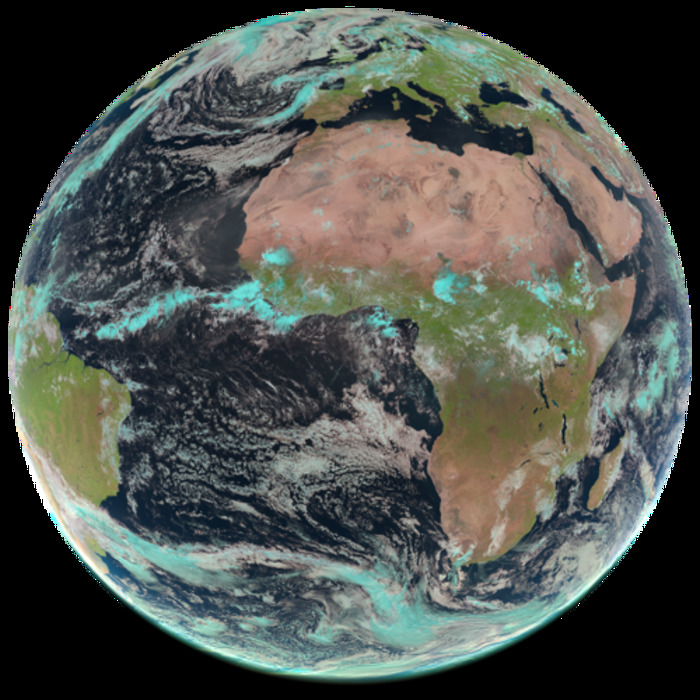

In [40]:
im = Image.open(output + 'natural_color_resized.jpg', 'r')
display(im)

On peut afficher les metadonnées de cette image en utilisant la commande suivante :

In [41]:
print(scn["natural_color"])

<xarray.DataArray 'where-3ced8b3d32b0f13d093f5b21d1073817' (bands: 3, y: 3712,
                                                            x: 3712)> Size: 165MB
dask.array<where, shape=(3, 3712, 3712), dtype=float32, chunksize=(1, 461, 3712), chunktype=numpy.ndarray>
Coordinates:
    crs      object 8B PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["unknown...
  * y        (y) float64 30kB 5.569e+06 5.566e+06 ... -5.563e+06 -5.566e+06
  * x        (x) float64 30kB -5.569e+06 -5.566e+06 ... 5.563e+06 5.566e+06
  * bands    (bands) <U1 12B 'R' 'G' 'B'
Attributes: (12/20)
    standard_name:                          natural_color
    end_time:                               2024-06-17 12:15:00
    platform_name:                          Meteosat-10
    ancillary_variables:                    []
    orbital_parameters:                     {'projection_longitude': 0.0, 'pr...
    start_time:                             2024-06-17 12:00:00
    ...                                     ...
    wav

### Exploration des données

Il est possible d'explorer les données.
Par exemple, récupérer la valeur maximum ou minimum contenue dans les données :

In [42]:
scn['IR_108'].max().compute()

<xarray.DataArray 'reshape-421323b59db307daf97b48af76fdf97f' ()> Size: 4B
array(332.01096, dtype=float32)
Coordinates:
    crs      object 8B PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["unknown...

Et pour la valeur minimum :

In [43]:
scn['IR_108'].min().compute()

<xarray.DataArray 'reshape-421323b59db307daf97b48af76fdf97f' ()> Size: 4B
array(186.32803, dtype=float32)
Coordinates:
    crs      object 8B PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["unknown...

### Reprojection et découpage des données

Satpy propose des zones prédéfinies sur lesquelles il est possible de découper les données.
Ces zones sont disponibles à cette adresse :
https://github.com/pytroll/satpy/blob/main/satpy/etc/areas.yaml


Par exemple, pour charger une zone qui correspond à l'Afrique, pour le canal 10.8:

(Attention cette étape est assez longue)

In [45]:
local_scene = scn.resample("africa")
local_scene.show('IR_108')

local_scene.save_dataset('IR_108', '../RESULTS/africa_108.png')
!convert -resize 500x500 {output}/africa_108.png {output}/africa_108_min.jpg


INFO:satpy.resample:Using default KDTree resampler


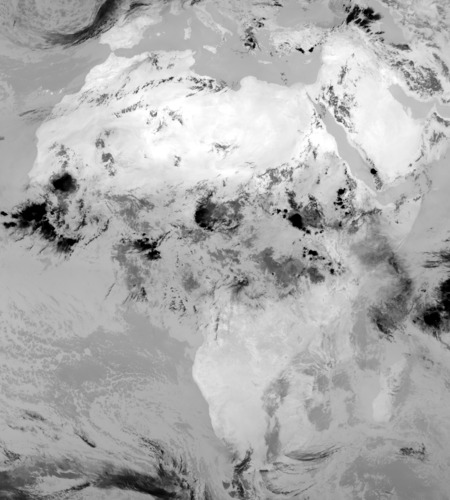

In [46]:
im2 = Image.open(output + '/africa_108_min.jpg', 'r')
display(im2)

Consultons les métadonnées de cette scène :

In [47]:
local_scene['IR_108']

<xarray.DataArray 'my_index-50393f4265c9fde4cad262b6373b324c' (y: 9276, x: 8350)> Size: 310MB
dask.array<my_index, shape=(9276, 8350), dtype=float32, chunksize=(4096, 4096), chunktype=numpy.ndarray>
Coordinates:
    crs      object 8B PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown...
  * y        (y) float64 74kB 4.48e+06 4.479e+06 ... -4.794e+06 -4.795e+06
  * x        (x) float64 67kB -4.458e+06 -4.457e+06 ... 3.89e+06 3.891e+06
Attributes: (12/18)
    orbital_parameters:       {'projection_longitude': 0.0, 'projection_latit...
    units:                    K
    wavelength:               10.8 µm (9.8-11.8 µm)
    standard_name:            toa_brightness_temperature
    platform_name:            Meteosat-10
    sensor:                   seviri
    ...                       ...
    name:                     IR_108
    resolution:               3000.403165817
    calibration:              brightness_temperature
    modifiers:                ()
    _satpy_id:                DataID(name='IR_108', wavelength=WavelengthRang...
    ancillary_variables:      []

Consultons la valeur minimum des données de cette zone :

In [48]:
local_scene['IR_108'].min().compute()

<xarray.DataArray 'my_index-50393f4265c9fde4cad262b6373b324c' ()> Size: 4B
array(186.32803, dtype=float32)
Coordinates:
    crs      object 8B PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown...

## Utilisation de la palette de couleur Setvak

Martin Setvak est un chercheur spécialisé dans les phénomènes convectifs qui a définit une palette qui porte son nom.
Cette palette est dédiée à la visualisation des phénomènes convectifs :

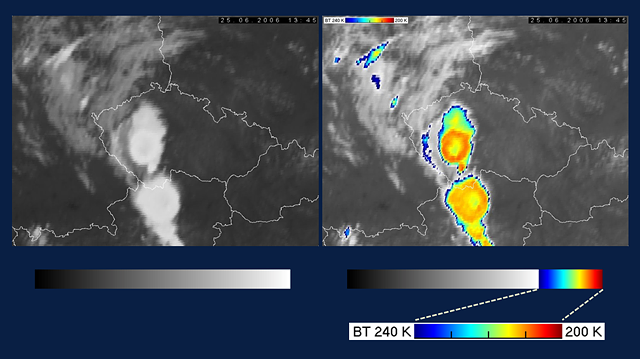

### Setvak : "L'amélioration des échelles de gris ou de couleurs, utilisée pour la visualisation des images thermiques par fenêtre IR, est utilisée depuis les premiers jours des satellites météorologiques. Le but de cette technique est évident : fournir à l’œil humain plus de détails dans une plage de températures spécifique, des détails qui autrement resteraient cachés."

Plus d'informations sont disponibles à ce lien : https://cwg.eumetsat.int/color-enhancements/

Il est possible de créer cette palette :

In [51]:
# Création d'une nouvelle palette de couleur - SETVAK

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

bottom = cm.get_cmap("Greys", 98)
top = cm.get_cmap('jet_r', 148)

newcolors = np.vstack((top(np.linspace(0, 1, 98)),
                       bottom(np.linspace(0, 1, 148))))
newcmp = ListedColormap(newcolors, name='Setvak')

Maintenant, il est possible d'afficher les données en utilisant cette nouvelle palette.
Et, nous allons rajouter un titre à l'image.

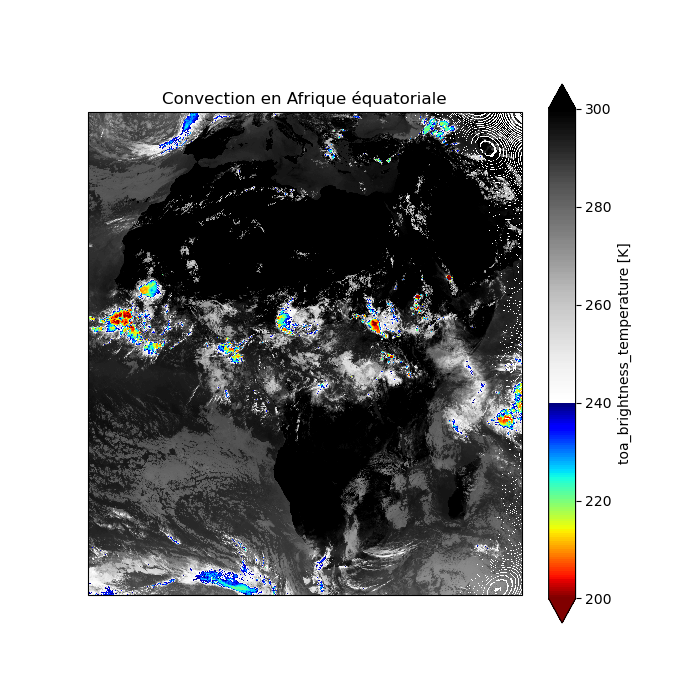

In [52]:
#import cartopy.feature as cfeature

plt.figure(figsize=(7, 7))


crs =local_scene['IR_108'].attrs['area'].to_cartopy_crs()
ax = plt.axes(projection=crs)

local_scene['IR_108'].plot.imshow(cmap=newcmp, vmin=200, vmax=300, alpha=1) 
plt.title("Convection en Afrique équatoriale")
plt.show()

Enfin, sauvegardons la figure dans le dossier de sauvegarde :

In [58]:
plt.savefig(output + 'IR_108_setvak_HD.png', dpi = 300)
plt.savefig(output + 'IR_108_setvak.png', dpi = 100)

In [59]:
!convert -resize 2000 {output}/IR_108_setvak_HD.png {output}/IR_108_setvak_HD.jpg
!convert -resize 500 {output}/IR_108_setvak.png {output}/IR_108_setvak.jpg


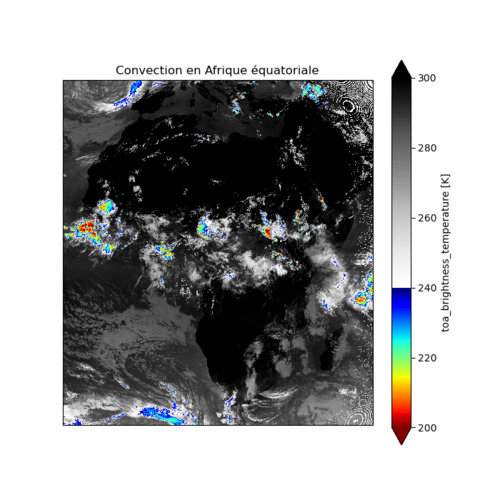

In [56]:
im = Image.open(output + 'IR_108_setvak.jpg', 'r')
display(im)

In [60]:
# Nettoyage
!rm {output}/*.png {output}/*.tif